### Step1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step2. Creating & Reading the data

In [2]:
df = pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Imaritcus Notes\Machine Learning\Drug Classification\Drug.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### Step3. Check if there are missing values. If yes, handle them.

In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
for i in df:
    print({i:df[i].unique()})

{'Age': array([23, 47, 28, 61, 22, 49, 41, 60, 43, 34, 74, 50, 16, 69, 32, 57, 63,
       48, 33, 31, 39, 45, 18, 65, 53, 46, 15, 73, 58, 66, 37, 68, 67, 62,
       24, 26, 40, 38, 29, 17, 54, 70, 36, 19, 64, 59, 51, 42, 56, 20, 72,
       35, 52, 55, 30, 21, 25], dtype=int64)}
{'Sex': array(['F', 'M'], dtype=object)}
{'BP': array(['HIGH', 'LOW', 'NORMAL'], dtype=object)}
{'Cholesterol': array(['HIGH', 'NORMAL'], dtype=object)}
{'Na_to_K': array([25.355, 13.093, 10.114,  7.798, 18.043,  8.607, 16.275, 11.037,
       15.171, 19.368, 11.767, 19.199, 15.376, 20.942, 12.703, 15.516,
       11.455, 13.972,  7.298, 25.974, 19.128, 25.917, 30.568, 15.036,
       33.486, 18.809, 30.366,  9.381, 22.697, 17.951,  8.75 ,  9.567,
       11.014, 31.876, 14.133,  7.285,  9.445, 13.938,  9.709,  9.084,
       19.221, 14.239, 15.79 , 12.26 , 12.295,  8.107, 13.091, 10.291,
       31.686, 19.796, 19.416, 10.898, 27.183, 18.457, 10.189, 14.16 ,
       11.34 , 27.826, 10.091, 18.703, 29.875,  9.475, 20.6

### Step4. Data Exploration 

In [11]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

<BarContainer object of 200 artists>

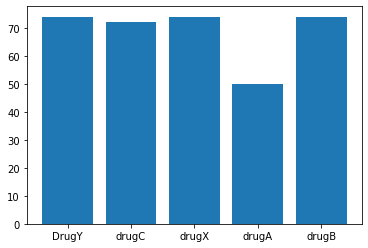

In [16]:
plt.bar(x="Drug",height="Age",data=df)

<AxesSubplot:xlabel='BP', ylabel='count'>

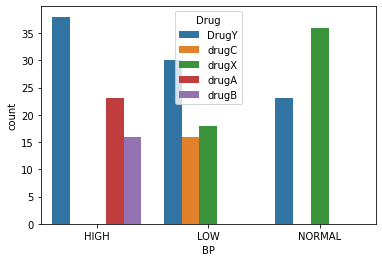

In [19]:
sns.countplot(x="BP",hue="Drug",data=df)

<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

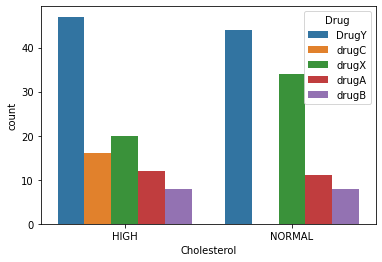

In [20]:
sns.countplot(x="Cholesterol",hue="Drug",data=df)

In [22]:
drug_value=df.Drug.value_counts()

([<matplotlib.patches.Wedge at 0x1f287a0fd00>,
 [Text(0.15499131026807186, 1.0890260298732013, 'DrugY'),
  Text(-0.9287606496234333, -0.5894095823033915, 'drugX'),
  Text(0.22306619331099625, -1.0771450568060652, 'drugA'),
  Text(0.801865608605421, -0.7530016903937586, 'drugC'),
  Text(1.0654415171968743, -0.27355872026536265, 'drugB')],
 [Text(0.08454071469167555, 0.5940141981126551, '45.50%'),
  Text(-0.5065967179764181, -0.3214961358018498, '27.00%'),
  Text(0.12167246907872521, -0.5875336673487628, '11.50%'),
  Text(0.43738124105750237, -0.4107281947602319, '8.00%'),
  Text(0.5811499184710223, -0.1492138474174705, '8.00%')])

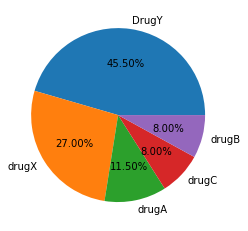

In [23]:
plt.pie(drug_value,labels=drug_value.keys(),autopct="%.2f%%")

# Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["BP"]= le.fit_transform(df["BP"])
df["Cholesterol"]= le.fit_transform(df["Cholesterol"])
df["Drug"]= le.fit_transform(df["Drug"])

### Step5. Creating X & Y

In [28]:
X=df.values[:,:-1]
Y=df.values[:,-1]

In [30]:
print(X.shape)
print(Y.shape)

(200, 5)
(200,)


### Scaling the data

In [36]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X=scaler.fit_transform(X)
#print(X)

### Step6. Shuffle and Split Data

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=10)

In [56]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(140, 5)
(140,)
(60, 5)
(60,)


# Training the model using Knn

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')
knn.fit(X_train,Y_train)

Y_pred=knn.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0.0, 0.0), (4.0, 4.0), (0.0, 4.0), (4.0, 4.0), (0.0, 0.0), (0.0, 0.0), (4.0, 4.0), (3.0, 4.0), (0.0, 0.0), (3.0, 0.0), (0.0, 0.0), (3.0, 3.0), (0.0, 4.0), (2.0, 4.0), (2.0, 1.0), (4.0, 4.0), (0.0, 0.0), (1.0, 0.0), (4.0, 4.0), (0.0, 0.0), (0.0, 4.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (3.0, 4.0), (0.0, 0.0), (2.0, 0.0), (3.0, 0.0), (3.0, 2.0), (0.0, 4.0), (4.0, 0.0), (4.0, 4.0), (1.0, 3.0), (0.0, 1.0), (4.0, 4.0), (0.0, 0.0), (4.0, 4.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (3.0, 0.0), (0.0, 0.0), (2.0, 1.0), (4.0, 4.0), (4.0, 4.0), (4.0, 0.0), (4.0, 4.0), (2.0, 4.0), (4.0, 4.0), (0.0, 0.0), (4.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (2.0, 2.0), (0.0, 0.0), (0.0, 0.0)]


# Evaluation

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[20  1  0  0  4]
 [ 3  3  0  1  0]
 [ 1  2  1  0  2]
 [ 3  0  1  1  2]
 [ 3  0  0  0 12]]
classification report
              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73        25
         1.0       0.50      0.43      0.46         7
         2.0       0.50      0.17      0.25         6
         3.0       0.50      0.14      0.22         7
         4.0       0.60      0.80      0.69        15

    accuracy                           0.62        60
   macro avg       0.55      0.47      0.47        60
weighted avg       0.59      0.62      0.58        60

Accuracy of the model: 0.6166666666666667


In [70]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,11):
    model_KNN=KNeighborsClassifier(n_neighbors=K,metric='euclidean')
    model_KNN.fit(X_train,Y_train)
    Y_pred=model_KNN.predict(X_test)
    print("Accuracy is",accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is 0.8833333333333333 for K-Value: 1
Accuracy is 0.7333333333333333 for K-Value: 2
Accuracy is 0.6666666666666666 for K-Value: 3
Accuracy is 0.6833333333333333 for K-Value: 4
Accuracy is 0.6166666666666667 for K-Value: 5
Accuracy is 0.6666666666666666 for K-Value: 6
Accuracy is 0.65 for K-Value: 7
Accuracy is 0.6833333333333333 for K-Value: 8
Accuracy is 0.6833333333333333 for K-Value: 9
Accuracy is 0.65 for K-Value: 10


In [71]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print(k,":",my_dict[k])

1 : 0.8833333333333333


In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
knn.fit(X_train,Y_train)

Y_pred=knn.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0.0, 1.0), (4.0, 4.0), (0.0, 0.0), (4.0, 4.0), (0.0, 0.0), (0.0, 0.0), (4.0, 0.0), (3.0, 3.0), (0.0, 0.0), (3.0, 3.0), (0.0, 0.0), (3.0, 3.0), (0.0, 0.0), (2.0, 1.0), (2.0, 2.0), (4.0, 4.0), (0.0, 0.0), (1.0, 1.0), (4.0, 4.0), (0.0, 0.0), (0.0, 4.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (3.0, 3.0), (0.0, 0.0), (2.0, 2.0), (3.0, 3.0), (3.0, 3.0), (0.0, 0.0), (4.0, 4.0), (4.0, 4.0), (1.0, 1.0), (0.0, 0.0), (4.0, 4.0), (0.0, 4.0), (4.0, 4.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (3.0, 3.0), (0.0, 0.0), (2.0, 1.0), (4.0, 4.0), (4.0, 4.0), (4.0, 4.0), (4.0, 4.0), (2.0, 2.0), (4.0, 4.0), (0.0, 0.0), (4.0, 4.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (2.0, 0.0), (0.0, 0.0), (0.0, 0.0)]


In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[22  1  0  0  2]
 [ 0  7  0  0  0]
 [ 1  2  3  0  0]
 [ 0  0  0  7  0]
 [ 1  0  0  0 14]]
classification report
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        25
         1.0       0.70      1.00      0.82         7
         2.0       1.00      0.50      0.67         6
         3.0       1.00      1.00      1.00         7
         4.0       0.88      0.93      0.90        15

    accuracy                           0.88        60
   macro avg       0.90      0.86      0.86        60
weighted avg       0.90      0.88      0.88        60

Accuracy of the model: 0.8833333333333333


In [59]:
from sklearn.linear_model import LogisticRegression
cf = LogisticRegression()

cf.fit(X_train,Y_train)

Y_pred = cf.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0.0, 0.0), (4.0, 4.0), (0.0, 0.0), (4.0, 4.0), (0.0, 0.0), (0.0, 0.0), (4.0, 4.0), (3.0, 0.0), (0.0, 0.0), (3.0, 3.0), (0.0, 0.0), (3.0, 3.0), (0.0, 0.0), (2.0, 1.0), (2.0, 2.0), (4.0, 4.0), (0.0, 0.0), (1.0, 1.0), (4.0, 4.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (3.0, 3.0), (0.0, 0.0), (2.0, 2.0), (3.0, 0.0), (3.0, 3.0), (0.0, 4.0), (4.0, 4.0), (4.0, 4.0), (1.0, 1.0), (0.0, 0.0), (4.0, 4.0), (0.0, 0.0), (4.0, 4.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (3.0, 3.0), (0.0, 0.0), (2.0, 1.0), (4.0, 4.0), (4.0, 4.0), (4.0, 4.0), (4.0, 4.0), (2.0, 2.0), (4.0, 4.0), (0.0, 0.0), (4.0, 4.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 2.0), (2.0, 2.0), (0.0, 0.0), (0.0, 0.0)]


In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("classification report")

print(classification_report(Y_test,Y_pred))

acc = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[23  0  1  0  1]
 [ 0  7  0  0  0]
 [ 0  2  4  0  0]
 [ 2  0  0  5  0]
 [ 0  0  0  0 15]]
classification report
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        25
         1.0       0.78      1.00      0.88         7
         2.0       0.80      0.67      0.73         6
         3.0       1.00      0.71      0.83         7
         4.0       0.94      1.00      0.97        15

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.86        60
weighted avg       0.91      0.90      0.90        60

Accuracy of the model: 0.9
